In [1]:
import pandas as pd

In [53]:
df_over = pd.read_csv('./국민여행조사/해외여행 데이터셋.csv')

In [54]:
df_over.columns

Index(['ID', 'AA3_1', 'AA3_2', 'AA3_3', 'AA3_4', 'AA3_5', 'AA3_6', 'AA3_7',
       'AA3_8', 'AA3_9', 'AA3_10', 'AA3_11', 'AA3_12', 'AA3_13', 'AA3_14',
       'AA3_15', 'AA3_16', 'AA3_17', 'AA3_18', 'AA3_19', 'AA3_20', 'AA3_21',
       'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'label'],
      dtype='object')

In [56]:
df_over_s = df_over[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15']]
df_over_slabel = df_over[['label']]
df_over_a = df_over[['AA3_1', 'AA3_2', 'AA3_3', 'AA3_4', 'AA3_5', 'AA3_6', 'AA3_7',
       'AA3_8', 'AA3_9', 'AA3_10', 'AA3_11', 'AA3_12', 'AA3_13', 'AA3_14',
       'AA3_15', 'AA3_16', 'AA3_17', 'AA3_18', 'AA3_19', 'AA3_20', 'AA3_21']]
df_over_alabel = df_over[['label']]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
X = df_over_s
y = df_over_slabel.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
# 여행지 선정기준에 따른 랜덤포레스트
rfMod = RandomForestClassifier(n_estimators=5, criterion='gini', max_depth=None, min_samples_split=3,
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                              max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                              verbose=0)
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [60]:
rfMod.score(X_train, y_train)

0.9393939393939394

In [61]:
y_pred = rfMod.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9090909090909091


 1)A01                           0.244474
 2)A02                           0.176501
 3)A03                           0.173079
 4)A04                           0.138231
 5)A05                           0.125914
 6)A06                           0.052040
 7)A07                           0.041086
 8)A08                           0.017145
 9)A09                           0.013174
10)A10                           0.011686
11)A11                           0.004960
12)A12                           0.001345
13)A13                           0.000365
14)A14                           0.000000
15)A15                           0.000000


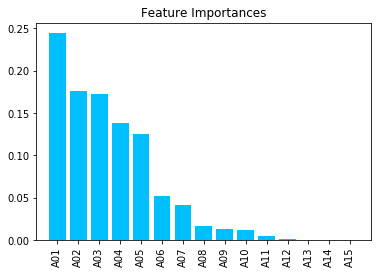

In [62]:
import numpy as np
X = df_over_s
y = df_over_slabel.label
features_label = df_over_s.columns
forest = RandomForestClassifier(n_estimators = 50, random_state = 0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], importances[indices[i]]))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [63]:
X = df_over_a
y = df_over_alabel.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# 여행활동에 따른 랜덤포레스트
rfMod = RandomForestClassifier(n_estimators=5, criterion='gini', max_depth=None, min_samples_split=3,
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                              max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                              verbose=0)
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [64]:
rfMod.score(X_train, y_train)

1.0

In [65]:
y_pred = rfMod.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.6363636363636364


 1)AA3_1                         0.223572
 2)AA3_2                         0.136159
 3)AA3_3                         0.115000
 4)AA3_4                         0.099700
 5)AA3_5                         0.094714
 6)AA3_6                         0.068384
 7)AA3_7                         0.053591
 8)AA3_8                         0.045187
 9)AA3_9                         0.042503
10)AA3_10                        0.031905
11)AA3_11                        0.029215
12)AA3_12                        0.028286
13)AA3_13                        0.023961
14)AA3_14                        0.007824
15)AA3_15                        0.000000
16)AA3_16                        0.000000
17)AA3_17                        0.000000
18)AA3_18                        0.000000
19)AA3_19                        0.000000
20)AA3_20                        0.000000
21)AA3_21                        0.000000


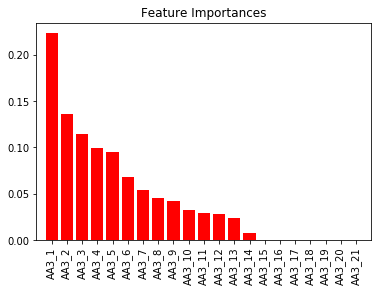

In [66]:
X = df_over_a
y = df_over_alabel.label
features_label = df_over_a.columns
forest = RandomForestClassifier(n_estimators = 50, random_state = 0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], importances[indices[i]]))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()